<a href="https://colab.research.google.com/github/LarsBryld/socialdataanalysis2020/blob/master/Oxford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

ox = pd.read_csv("https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv" , parse_dates=["Date"])

covid = pd.read_csv("https://open-covid-19.github.io/data/data.csv", parse_dates=["Date"], na_values='-')



#Define focus contries based on stock indecies
focuscountries = set(['China', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Italy', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Netherlands', 'Poland', 'Portugal', 'Spain',
                  'Sweden', 'Switzerland', 'United Kingdom', 'Canada', 'United States', 'Australia', 'New Zealand', 'Hong Kong', 'Japan', 'South Korea', 'Singapore',
                  'Taiwan', 'Brazil', 'Israel', 'India', 'Mexico', 'South Africa', 'Russia'])


#Create dataframes of only focus countries
ox = ox[ox['CountryName'].isin(focuscountries)]
covid = covid[covid['CountryName'].isin(focuscountries)]


#Sometimes, due to data entry errors, we have isgeneral=1 when the underlying indicator is 0 or null. These cases should be disregarded. Only use isgeneral=1 values when the underlying indicator is 1 or higher.

#ox = ox[(ox['S1_IsGeneral'] != 1) & (ox['S1_School closing'] > 0)]
#ox =  (ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0) 
#ox = ox[(ox['S2_IsGeneral'] != 1) & (ox['S2_Workplace closing'] > 0)]
#ox = ox[(ox['S3_IsGeneral'] != 1) & (ox['S3_Cancel public events'] > 0)]
#ox = ox[(ox['S4_IsGeneral'] != 1) & (ox['S4_Close public transport'] > 0)]
#ox = ox[(ox['S5_IsGeneral'] != 1) & (ox['S5_Public information campaigns'] > 0)]
#ox = ox[(ox['S6_IsGeneral'] != 1) & (ox['S6_Restrictions on internal movement'] > 0)]
#drop2 = ox[(ox['S1_IsGeneral'] == 1) & (ox['S1_School closing'] == 0)] 


#Nine of the indicators (S1–S7, S12 and S13) take policies such as school closures, travel bans, etc, and are recorded on an ordinal scale
#policies = ox[['CountryName', 'Date', 'S1_School closing', 'S2_Workplace closing', 'S3_Cancel public events', 'S3_Cancel public events', 'S4_Close public transport', 'S5_Public information campaigns', 'S6_Restrictions on internal movement', 'S7_International travel controls']]

#the others (S8–S11) are financial indicators such as fiscal or monetary measures
#financial = ox[['CountryName', 'Date', 'S8_Fiscal measures', 'S9_Monetary measures', 'S10_Emergency investment in health care', 'S11_Investment in Vaccines']]

#The tracker aggregates the policy scores (not the financial scores) into a common ‘Stringency Index’.
#stringency = ox[['CountryName', 'Date', 'StringencyIndex']]

ox_country = (ox['CountryName']).unique()
covid_country = (covid['CountryName']).unique()



In [0]:
#Renaming the NaN regional codes to 'Country', since we then can isolate total country level data using this variable

covid['RegionCode'] = covid['RegionCode'].fillna('Country')


In [38]:

print("The Covid data has {} unique countries and {} unique dates".format(len(covid_country),len(covid['Date'].unique())))
print("The Covid data has start data {} and end date {} ".format(min(covid['Date']),max(covid['Date'])))
print("The Oxford data has {} unique countries and {} unique dates".format(len(ox_country),len(ox['Date'].unique())))
print("The Oxford data has start data {} and end date {} ".format(min(ox['Date']),max(ox['Date'])))
print("The country in Oxford data that is NOT in Covid data is THIS Function IS MISSING {:10.0f} ".format(len(ox['CountryName'].unique()),len(ox['Date'].unique())))

# https://www.dataquest.io/blog/python-datetime-tutorial/ useful link to corect the printed date format


The Covid data has 31 unique countries and 124 unique dates
The Covid data has start data 2019-12-30 00:00:00 and end date 2020-05-01 00:00:00 
The Oxford data has 33 unique countries and 122 unique dates
The Oxford data has start data 2020-01-01 00:00:00 and end date 2020-05-01 00:00:00 
The country in Oxford data that is NOT in Covid data is THIS Function IS MISSING         33 


In [0]:
#Creating single country example for test of merging. 
ox_den = ox[ox['CountryName'] == 'Denmark']
covid_den = covid[covid['CountryName'] == 'Denmark']

#Creating single country example for merging test.
ox_it = ox[ox['CountryCode'] == 'ITA']
covid_it = covid[(covid['CountryName'] == 'Italy') & (covid['Key'] == 'IT')]


In [0]:
#reduce the variables that are not being used both in oxford and covid data
drop_ox = ['CountryName', 'CountryCode'] 
ox_it = ox_it.drop(drop_ox, axis=1)

drop_covid = ['Key', 'CountryCode'] 
covid_it = covid_it.drop(drop_covid, axis=1)

In [41]:
# Summing total confirmed cases for it to compare against the entire data set 
it = pd.merge(covid_it,ox_it, how='inner', on='Date')
sum(it['Confirmed'])


5936711.0

In [42]:
# Same as above but for DK 
den = pd.merge(covid_den,ox_den, how='inner', on='Date')
sum(den['Confirmed'])

219694.0

In [0]:
#making a general solution to the above mereging example. oxford_data is the complete data set 

oxford_data = pd.merge(covid,ox, how='inner', on=['Date', 'CountryName'])


In [44]:
#testing that the manual merging example creates the same results as in the oxford_data

it_test = oxford_data[(oxford_data['CountryName'] == 'Italy') & (oxford_data['RegionCode'] == 'Country')]
sum(it_test['Confirmed'])

5936711.0

In [45]:
#same as above but for denmark

dk_test = oxford_data[(oxford_data['CountryName'] == 'Denmark') & (oxford_data['RegionCode'] == 'Country')]
sum(dk_test['Confirmed'])
dk_test.head(5)

,Date,Key,CountryCode_x,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population,CountryCode_y,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
8,2020-01-01,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
36,2020-01-02,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
64,2020-01-03,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
92,2020-01-04,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
120,2020-01-05,DK,DK,Denmark,Country,NaN,0.0,0.0,56.26392,9.501785,5771876.0,DNK,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


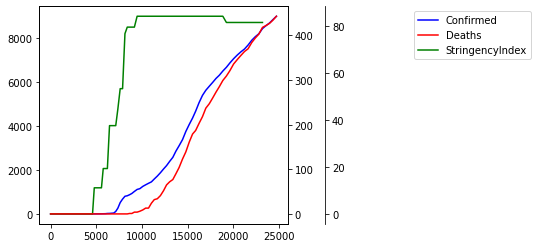

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
df = DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])

fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

dk_test.Confirmed.plot(ax=ax, x=dk_test.Date, style='b-')
# same ax as above since it's automatically added on the right
dk_test.Deaths.plot(ax=ax, x=dk_test.Date, style='r-', secondary_y=True)
dk_test.StringencyIndex.plot(ax=ax3, x=dk_test.Date, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['Confirmed','Deaths','StringencyIndex'], bbox_to_anchor=(2.0, 1.0))

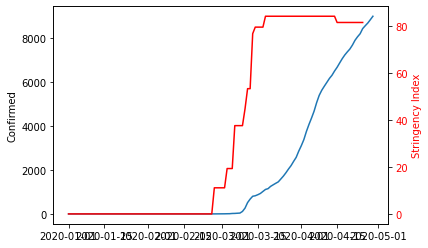

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = dk_test.Date
y1 = dk_test.Confirmed
y2 = dk_test.StringencyIndex

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Confirmed')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Stringency Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

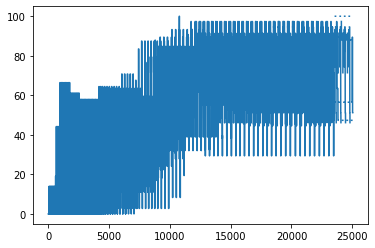

A full description of the strengency index can be found here: 

https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Additional desciption on a less detailed level: 

https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker



equals(self, other)

Test whether two objects contain the same elements.

https://pandas.pydata.org/docs/getting_started/basics.html


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

